In [ ]:
# mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import modules
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# need to add nltk imports up here
# link: https://www.nltk.org/
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
dataframe = pd.read_csv("/content/drive/MyDrive/DS Project/DisneylandReviews.csv", encoding="latin-1")
dataframe.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [ ]:
print(dataframe["Review_Text"][0])
print(dataframe["Review_Text"][1])
print(dataframe["Review_Text"][2])

If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. 
Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seems more local like Ocean Park or even worst!!They got no SMILING face, but 

In [ ]:
dataframe['Branch'].value_counts()

Branch
Disneyland_California    19406
Disneyland_Paris         13630
Disneyland_HongKong       9620
Name: count, dtype: int64

In [ ]:
df_California= dataframe[dataframe['Branch']=="Disneyland_California"]
df_California.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
9620,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California
9621,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California
9622,670565072,4,2019-5,Australia,All and all a great day was had. The crowds ar...,Disneyland_California
9623,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California
9624,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California


In [ ]:
df_California.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
9620,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California
9621,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California
9622,670565072,4,2019-5,Australia,All and all a great day was had. The crowds ar...,Disneyland_California
9623,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California
9624,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California


In [ ]:
# Call the isnull() method on the dataframe object
missing_values = dataframe.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64


<ipython-input-14-5bd658f5731a>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


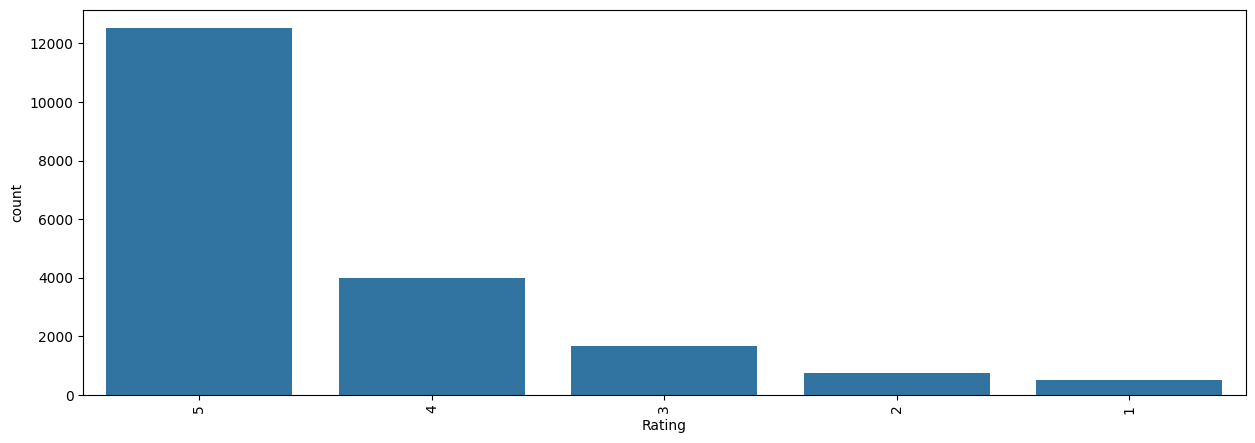

In [ ]:

plt.figure(figsize=(15,5))
ax = sns.countplot(x="Rating", data=df_California,
                   order = df_California['Rating'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

# California Disneyland Analysis

In [ ]:
# one line of code! we made a new column and populated it
df_California['New_Rating'] = np.where(df_California['Rating'] < 3, 0, 1)

df_California.head()

<ipython-input-17-119f3bf7647a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_California['New_Rating'] = np.where(df_California['Rating'] < 3, 0, 1)


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
9620,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California,1
9621,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California,1
9622,670565072,4,2019-5,Australia,All and all a great day was had. The crowds ar...,Disneyland_California,1
9623,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California,1
9624,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California,1


## Exploring the text data

###High Rating Reviews Analysis for California DisneyLand

In [ ]:
df_California_high = df_California[df_California['New_Rating']==1]
df_California_high.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18160 entries, 9620 to 29025
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          18160 non-null  int64 
 1   Rating             18160 non-null  int64 
 2   Year_Month         18160 non-null  object
 3   Reviewer_Location  18160 non-null  object
 4   Review_Text        18160 non-null  object
 5   Branch             18160 non-null  object
 6   New_Rating         18160 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [ ]:
df_California_high.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
9620,670801367,5,2019-4,United States,This place has always been and forever will be...,Disneyland_California,1
9621,670760708,5,2019-4,United States,A great day of simple fun and thrills. Bring c...,Disneyland_California,1
9622,670565072,4,2019-5,Australia,All and all a great day was had. The crowds ar...,Disneyland_California,1
9623,670544335,5,2019-4,United States,Having been to the Florida location numerous t...,Disneyland_California,1
9624,670472278,5,2019-4,Canada,"Had the 4 day pass, spent 3 at DL and one at C...",Disneyland_California,1


In [ ]:
print(df_California_high.index)


Index([ 9620,  9621,  9622,  9623,  9624,  9625,  9626,  9627,  9628,  9629,
       ...
       29015, 29016, 29017, 29018, 29019, 29020, 29021, 29022, 29024, 29025],
      dtype='int64', length=18160)


In [ ]:
df_California_high = df_California_high.reset_index(drop=True)


In [ ]:
print(df_California_high['Review_Text'][0])
print(df_California_high['Review_Text'][1])
print(df_California_high['Review_Text'][2])


This place has always been and forever will be special. The feeling you get entering the park, seeing the characters and different attractions is just priceless. This is definitely a dream trip for all ages, especially young kids. Spend the money and go to Disneyland, you will NOT regret it
A great day of simple fun and thrills. Bring cash, nothing is cheap, but we knew that it's Disney. But they are great letting you bring in your own food, drinks, etc but read the list closely, we list several items at the entry gates (selfy sticks, glass refill bottles, etc). It is worth buying the photo pass and fastpass. Have fun! 
All and all a great day was had. The crowds are huge and ride times sometimes up to a 50 min wait but worth it. Very disappointed the castle was under repair and covered but we understood. If you want to take a short cut on the rides grab a Max Pass for 15 each it allows you to book a time every 90mins and believe me it's a great feeling floating past the ques. 


###Lowercase

In [ ]:
df_California_high['Review_Text'] = df_California_high['Review_Text'].str.lower()
df_California_high.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
0,670801367,5,2019-4,United States,this place has always been and forever will be...,Disneyland_California,1
1,670760708,5,2019-4,United States,a great day of simple fun and thrills. bring c...,Disneyland_California,1
2,670565072,4,2019-5,Australia,all and all a great day was had. the crowds ar...,Disneyland_California,1
3,670544335,5,2019-4,United States,having been to the florida location numerous t...,Disneyland_California,1
4,670472278,5,2019-4,Canada,"had the 4 day pass, spent 3 at dl and one at c...",Disneyland_California,1


In [ ]:
print(df_California_high['Review_Text'][0])
print(df_California_high['Review_Text'][1])
print(df_California_high['Review_Text'][2])


this place has always been and forever will be special. the feeling you get entering the park, seeing the characters and different attractions is just priceless. this is definitely a dream trip for all ages, especially young kids. spend the money and go to disneyland, you will not regret it
a great day of simple fun and thrills. bring cash, nothing is cheap, but we knew that it's disney. but they are great letting you bring in your own food, drinks, etc but read the list closely, we list several items at the entry gates (selfy sticks, glass refill bottles, etc). it is worth buying the photo pass and fastpass. have fun! 
all and all a great day was had. the crowds are huge and ride times sometimes up to a 50 min wait but worth it. very disappointed the castle was under repair and covered but we understood. if you want to take a short cut on the rides grab a max pass for 15 each it allows you to book a time every 90mins and believe me it's a great feeling floating past the ques. 



###Strip funky characters (!,~-@$% etc)

In [ ]:
df_California_high['Review_Text'] = df_California_high['Review_Text'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df_California_high.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
0,670801367,5,2019-4,United States,this place has always been and forever will be...,Disneyland_California,1
1,670760708,5,2019-4,United States,a great day of simple fun and thrills. bring c...,Disneyland_California,1
2,670565072,4,2019-5,Australia,all and all a great day was had. the crowds ar...,Disneyland_California,1
3,670544335,5,2019-4,United States,having been to the florida location numerous t...,Disneyland_California,1
4,670472278,5,2019-4,Canada,"had the 4 day pass, spent 3 at dl and one at c...",Disneyland_California,1


In [ ]:
print(df_California_high['Review_Text'][0])
print(df_California_high['Review_Text'][1])
print(df_California_high['Review_Text'][2])


this place has always been and forever will be special. the feeling you get entering the park, seeing the characters and different attractions is just priceless. this is definitely a dream trip for all ages, especially young kids. spend the money and go to disneyland, you will not regret it
a great day of simple fun and thrills. bring cash, nothing is cheap, but we knew that it's disney. but they are great letting you bring in your own food, drinks, etc but read the list closely, we list several items at the entry gates (selfy sticks, glass refill bottles, etc). it is worth buying the photo pass and fastpass. have fun!
all and all a great day was had. the crowds are huge and ride times sometimes up to a 50 min wait but worth it. very disappointed the castle was under repair and covered but we understood. if you want to take a short cut on the rides grab a max pass for 15 each it allows you to book a time every 90mins and believe me it's a great feeling floating past the ques.


###Stop words

In [ ]:
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords') # this makes sure these are downloaded if you haven't already!
print(stopwords.words('english'))

stop = stopwords.words('english') # see why it's important to turn everything lower case? all of your stopwords are!

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_California_high['Review_Text'] = df_California_high['Review_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_California_high.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
0,670801367,5,2019-4,United States,place always forever special. feeling get ente...,Disneyland_California,1
1,670760708,5,2019-4,United States,"great day simple fun thrills. bring cash, noth...",Disneyland_California,1
2,670565072,4,2019-5,Australia,great day had. crowds huge ride times sometime...,Disneyland_California,1
3,670544335,5,2019-4,United States,florida location numerous times years know one...,Disneyland_California,1
4,670472278,5,2019-4,Canada,"4 day pass, spent 3 dl one ca. great place vis...",Disneyland_California,1


In [ ]:
print(df_California_high['Review_Text'][0])
print(df_California_high['Review_Text'][1])
print(df_California_high['Review_Text'][2])


place always forever special. feeling get entering park, seeing characters different attractions priceless. definitely dream trip ages, especially young kids. spend money go disneyland, regret
great day simple fun thrills. bring cash, nothing cheap, knew disney. great letting bring food, drinks, etc read list closely, list several items entry gates (selfy sticks, glass refill bottles, etc). worth buying photo pass fastpass. fun!
great day had. crowds huge ride times sometimes 50 min wait worth it. disappointed castle repair covered understood. want take short cut rides grab max pass 15 allows book time every 90mins believe great feeling floating past ques.


###Text EDA on the California high rating Data


### Most common words

In [ ]:
myTable = df_California_high['Review_Text'].str.split(expand=True).stack().value_counts()
myTable[0:20] # too cool!

park          12481
disneyland    11401
disney        10136
get            9619
rides          9549
time           9048
day            7861
go             7641
one            6355
great          6147
ride           5751
fast           4879
would          4798
place          4769
like           4417
pass           4341
much           4240
really         4187
see            4118
wait           3942
Name: count, dtype: int64

In [ ]:
x = df_California_high['Review_Text'].str.split(expand=True).stack().value_counts()
x = pd.DataFrame(x)
# reset the index
x.reset_index(inplace=True)
# rename the columns
x.rename(columns={x.columns[0]:'word', x.columns[1]:'frequency'}, inplace=True)
x.head()

,word,frequency
0,park,12481
1,disneyland,11401
2,disney,10136
3,get,9619
4,rides,9549


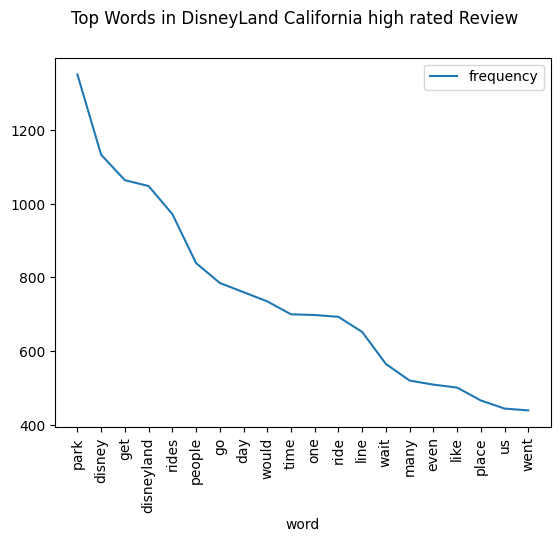

In [ ]:
x = x[0:20] # wanna play? change the 20 to 10 or 30 and see what happens...
            # you need to run the previous cell first
x.plot(x='word', y='frequency')
plt.xticks(np.arange(len(x)), x['word'], rotation=90)
plt.suptitle('Top Words in DisneyLand California high rated Review')
plt.show()


### Word Cloud

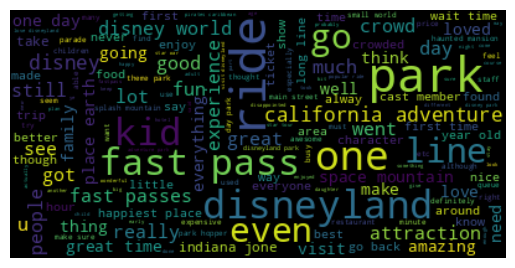

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(df_California_high['Review_Text']))

# # Display the generated image:
# # the matplotlib way:
# import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(df_California_high['Review_Text']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

###Tokenizer

In [ ]:
df_California_high['Review_Text'] = df_California_high.apply(lambda row: nltk.word_tokenize(row['Review_Text']), axis=1)
df_California_high.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
0,670801367,5,2019-4,United States,"[place, always, forever, special, ., feeling, ...",Disneyland_California,1
1,670760708,5,2019-4,United States,"[great, day, simple, fun, thrills, ., bring, c...",Disneyland_California,1
2,670565072,4,2019-5,Australia,"[great, day, had, ., crowds, huge, ride, times...",Disneyland_California,1
3,670544335,5,2019-4,United States,"[florida, location, numerous, times, years, kn...",Disneyland_California,1
4,670472278,5,2019-4,Canada,"[4, day, pass, ,, spent, 3, dl, one, ca, ., gr...",Disneyland_California,1


In [ ]:
print(df_California_high['Review_Text'][0])
print(df_California_high['Review_Text'][1])
print(df_California_high['Review_Text'][2])


['place', 'always', 'forever', 'special', '.', 'feeling', 'get', 'entering', 'park', ',', 'seeing', 'characters', 'different', 'attractions', 'priceless', '.', 'definitely', 'dream', 'trip', 'ages', ',', 'especially', 'young', 'kids', '.', 'spend', 'money', 'go', 'disneyland', ',', 'regret']
['great', 'day', 'simple', 'fun', 'thrills', '.', 'bring', 'cash', ',', 'nothing', 'cheap', ',', 'knew', 'disney', '.', 'great', 'letting', 'bring', 'food', ',', 'drinks', ',', 'etc', 'read', 'list', 'closely', ',', 'list', 'several', 'items', 'entry', 'gates', '(', 'selfy', 'sticks', ',', 'glass', 'refill', 'bottles', ',', 'etc', ')', '.', 'worth', 'buying', 'photo', 'pass', 'fastpass', '.', 'fun', '!']
['great', 'day', 'had', '.', 'crowds', 'huge', 'ride', 'times', 'sometimes', '50', 'min', 'wait', 'worth', 'it', '.', 'disappointed', 'castle', 'repair', 'covered', 'understood', '.', 'want', 'take', 'short', 'cut', 'rides', 'grab', 'max', 'pass', '15', 'allows', 'book', 'time', 'every', '90mins', 

## Lexicon Normalization

###Stemming

In [ ]:

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# this is the function we will use
ps = PorterStemmer()

filtered_sent = df_California_high['Review_Text'][1]

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)


Filtered Sentence: ['great', 'day', 'simple', 'fun', 'thrills', '.', 'bring', 'cash', ',', 'nothing', 'cheap', ',', 'knew', 'disney', '.', 'great', 'letting', 'bring', 'food', ',', 'drinks', ',', 'etc', 'read', 'list', 'closely', ',', 'list', 'several', 'items', 'entry', 'gates', '(', 'selfy', 'sticks', ',', 'glass', 'refill', 'bottles', ',', 'etc', ')', '.', 'worth', 'buying', 'photo', 'pass', 'fastpass', '.', 'fun', '!']
Stemmed Sentence: ['great', 'day', 'simpl', 'fun', 'thrill', '.', 'bring', 'cash', ',', 'noth', 'cheap', ',', 'knew', 'disney', '.', 'great', 'let', 'bring', 'food', ',', 'drink', ',', 'etc', 'read', 'list', 'close', ',', 'list', 'sever', 'item', 'entri', 'gate', '(', 'selfi', 'stick', ',', 'glass', 'refil', 'bottl', ',', 'etc', ')', '.', 'worth', 'buy', 'photo', 'pass', 'fastpass', '.', 'fun', '!']


In [ ]:

df_California_high['Stemmed'] = df_California_high['Review_Text'].apply(lambda x: [ps.stem(y) for y in x]) # Stem every word.

In [ ]:
# check your work!
print(df_California_high['Review_Text'][0]) # reported
print(df_California_high['Stemmed'][0]) # report

print(df_California_high['Review_Text'][10]) # note the difference between inches, reported, covered
print(df_California_high['Stemmed'][10]) # inch, report, cover

['place', 'always', 'forever', 'special', '.', 'feeling', 'get', 'entering', 'park', ',', 'seeing', 'characters', 'different', 'attractions', 'priceless', '.', 'definitely', 'dream', 'trip', 'ages', ',', 'especially', 'young', 'kids', '.', 'spend', 'money', 'go', 'disneyland', ',', 'regret']
['place', 'alway', 'forev', 'special', '.', 'feel', 'get', 'enter', 'park', ',', 'see', 'charact', 'differ', 'attract', 'priceless', '.', 'definit', 'dream', 'trip', 'age', ',', 'especi', 'young', 'kid', '.', 'spend', 'money', 'go', 'disneyland', ',', 'regret']
['going', 'disneyland', 'since', 'early', '60', 's', ',', 'magic', 'never', 'gets', 'old', '.', '4th', 'visit', 'year', '.', 'developed', 'strategy', 'works', 'best', 'us', '.', 'stay', 'disney', 'resort', 'get', '0700.', 'actually', 'get', '5', 'rides', 'less', '2', 'hours', '.', 'day', 'goes', 'crowds', 'thicken', 'wait', 'times', 'hour', 'making', 'difficult', 'experience', 'everything', '.', 'max', 'pass', 'worth', 'extra', '$', '.', 'ni

###Low Rating Reviews Analysis for California DisneyLand

In [ ]:
df_California_low = df_California[df_California['New_Rating']==0]
df_California_low.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 9633 to 29023
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          1246 non-null   int64 
 1   Rating             1246 non-null   int64 
 2   Year_Month         1246 non-null   object
 3   Reviewer_Location  1246 non-null   object
 4   Review_Text        1246 non-null   object
 5   Branch             1246 non-null   object
 6   New_Rating         1246 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 77.9+ KB


In [ ]:
df_California_low.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
9633,669660324,2,2018-10,United States,It is no doubt a legendary place but I just do...,Disneyland_California,0
9636,669505006,1,missing,United States,I ve been to Disneyland several times in the...,Disneyland_California,0
9642,668730191,2,2019-4,United Kingdom,My partner and I paid $149 each for tickets to...,Disneyland_California,0
9650,667955757,1,2019-1,Australia,"To all who comes to this happy place, welcome....",Disneyland_California,0
9687,664615049,1,2019-4,Australia,"I am really disappointed with Disneyland.Old, ...",Disneyland_California,0


In [ ]:
print(df_California_low.index)


Index([ 9633,  9636,  9642,  9650,  9687,  9694,  9701,  9702,  9715,  9716,
       ...
       28933, 28934, 28939, 28960, 28962, 28983, 28987, 28991, 29010, 29023],
      dtype='int64', length=1246)


In [ ]:
df_California_low = df_California_low.reset_index(drop=True)


In [ ]:
print(df_California_low['Review_Text'][0])
print(df_California_low['Review_Text'][1])
print(df_California_low['Review_Text'][2])


It is no doubt a legendary place but I just dont think it's worth the money and headache of overcrowding and overpriced everything. Disney continues to raise the price of admission and the crowds are ridiculous every single day. There are plenty of things to do in SoCal that are cheap or free. Save your family hundreds of dollars and go somewhere else. 
I   ve been to Disneyland several times in the past 3 decades. This visit, I sensed the employees were disgruntled or unhappy. Very few smiles from the staff. In addition, the staff was prowling for people crossing the ropes while Fantasmic was on. Why do we need a Fastpass to enter to watch the Fan tasmic show when everyone has been situated and there is tons of space for paying customers without a Fastpass? See attached picture. Through the whole show, the entire space was unoccupied while there were 5 8 yr olds next to us straining to catch a glimpse.If you wanna pay $129 to stand in line for hours to ride an average of 9 rides that 

##Lowercase

In [ ]:
df_California_low['Review_Text'] = df_California_low['Review_Text'].str.lower()
df_California_low.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
0,669660324,2,2018-10,United States,it is no doubt a legendary place but i just do...,Disneyland_California,0
1,669505006,1,missing,United States,i ve been to disneyland several times in the...,Disneyland_California,0
2,668730191,2,2019-4,United Kingdom,my partner and i paid $149 each for tickets to...,Disneyland_California,0
3,667955757,1,2019-1,Australia,"to all who comes to this happy place, welcome....",Disneyland_California,0
4,664615049,1,2019-4,Australia,"i am really disappointed with disneyland.old, ...",Disneyland_California,0


In [ ]:
print(df_California_low['Review_Text'][0])
print(df_California_low['Review_Text'][1])
print(df_California_low['Review_Text'][2])


it is no doubt a legendary place but i just dont think it's worth the money and headache of overcrowding and overpriced everything. disney continues to raise the price of admission and the crowds are ridiculous every single day. there are plenty of things to do in socal that are cheap or free. save your family hundreds of dollars and go somewhere else. 
i   ve been to disneyland several times in the past 3 decades. this visit, i sensed the employees were disgruntled or unhappy. very few smiles from the staff. in addition, the staff was prowling for people crossing the ropes while fantasmic was on. why do we need a fastpass to enter to watch the fan tasmic show when everyone has been situated and there is tons of space for paying customers without a fastpass? see attached picture. through the whole show, the entire space was unoccupied while there were 5 8 yr olds next to us straining to catch a glimpse.if you wanna pay $129 to stand in line for hours to ride an average of 9 rides that 


##Strip funky characters (!,~-@$% etc)

In [ ]:
df_California_low['Review_Text'] = df_California_low['Review_Text'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df_California_low.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
0,669660324,2,2018-10,United States,it is no doubt a legendary place but i just do...,Disneyland_California,0
1,669505006,1,missing,United States,i ve been to disneyland several times in the...,Disneyland_California,0
2,668730191,2,2019-4,United Kingdom,my partner and i paid $149 each for tickets to...,Disneyland_California,0
3,667955757,1,2019-1,Australia,"to all who comes to this happy place, welcome....",Disneyland_California,0
4,664615049,1,2019-4,Australia,"i am really disappointed with disneyland.old, ...",Disneyland_California,0


In [ ]:
print(df_California_low['Review_Text'][0])
print(df_California_low['Review_Text'][1])
print(df_California_low['Review_Text'][2])


it is no doubt a legendary place but i just dont think it's worth the money and headache of overcrowding and overpriced everything. disney continues to raise the price of admission and the crowds are ridiculous every single day. there are plenty of things to do in socal that are cheap or free. save your family hundreds of dollars and go somewhere else.
i   ve been to disneyland several times in the past 3 decades. this visit, i sensed the employees were disgruntled or unhappy. very few smiles from the staff. in addition, the staff was prowling for people crossing the ropes while fantasmic was on. why do we need a fastpass to enter to watch the fan tasmic show when everyone has been situated and there is tons of space for paying customers without a fastpass? see attached picture. through the whole show, the entire space was unoccupied while there were 5 8 yr olds next to us straining to catch a glimpse.if you wanna pay $129 to stand in line for hours to ride an average of 9 rides that l

##Stop words

In [ ]:
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords') # this makes sure these are downloaded if you haven't already!
print(stopwords.words('english'))

stop = stopwords.words('english') # see why it's important to turn everything lower case? all of your stopwords are!

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_California_low['Review_Text'] = df_California_low['Review_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_California_low.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
0,669660324,2,2018-10,United States,doubt legendary place dont think worth money h...,Disneyland_California,0
1,669505006,1,missing,United States,disneyland several times past 3 decades. visit...,Disneyland_California,0
2,668730191,2,2019-4,United Kingdom,partner paid $149 tickets park partner wanted ...,Disneyland_California,0
3,667955757,1,2019-1,Australia,"comes happy place, welcome. well walts vision ...",Disneyland_California,0
4,664615049,1,2019-4,Australia,"really disappointed disneyland.old, tired, cro...",Disneyland_California,0


In [ ]:
print(df_California_low['Review_Text'][0])
print(df_California_low['Review_Text'][1])
print(df_California_low['Review_Text'][2])


doubt legendary place dont think worth money headache overcrowding overpriced everything. disney continues raise price admission crowds ridiculous every single day. plenty things socal cheap free. save family hundreds dollars go somewhere else.
disneyland several times past 3 decades. visit, sensed employees disgruntled unhappy. smiles staff. addition, staff prowling people crossing ropes fantasmic on. need fastpass enter watch fan tasmic show everyone situated tons space paying customers without fastpass? see attached picture. whole show, entire space unoccupied 5 8 yr olds next us straining catch glimpse.if wanna pay $129 stand line hours ride average 9 rides last 3 11 minute, place you. disneyland become greedy overcrowd double capacity make money without care customers. ridiculous minimal places sit rest large park. highly recommend universal studios vip pass mess.
partner paid $149 tickets park partner wanted see original disney castle.when paying tickets nothing mentioned couple 

##Text EDA on the California low rating Data



## Most common words

In [ ]:
myTable = df_California_low['Review_Text'].str.split(expand=True).stack().value_counts()
myTable[0:20] # too cool!

park          1351
disney        1133
get           1064
disneyland    1048
rides          972
people         839
go             785
day            760
would          735
time           700
one            698
ride           693
line           652
wait           565
many           520
even           509
like           501
place          466
us             444
went           439
Name: count, dtype: int64

In [ ]:
x = df_California_low['Review_Text'].str.split(expand=True).stack().value_counts()
x = pd.DataFrame(x)
# reset the index
x.reset_index(inplace=True)
# rename the columns
x.rename(columns={x.columns[0]:'word', x.columns[1]:'frequency'}, inplace=True)
x.head()

,word,frequency
0,park,1351
1,disney,1133
2,get,1064
3,disneyland,1048
4,rides,972


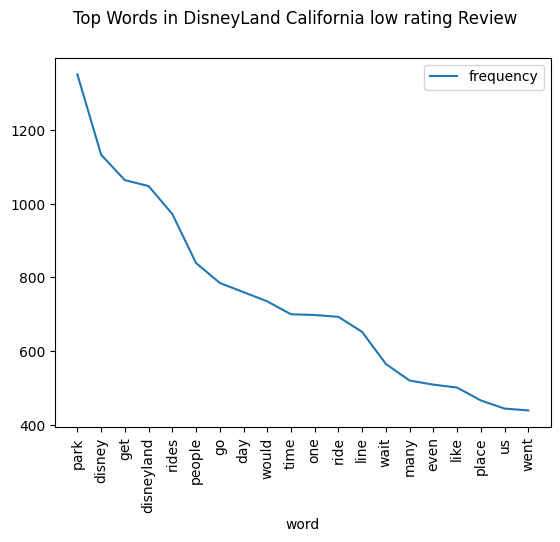

In [ ]:
x = x[0:20] # wanna play? change the 20 to 10 or 30 and see what happens...
            # you need to run the previous cell first
x.plot(x='word', y='frequency')
plt.xticks(np.arange(len(x)), x['word'], rotation=90)
plt.suptitle('Top Words in DisneyLand California low rating Review')
plt.show()


## Word Cloud

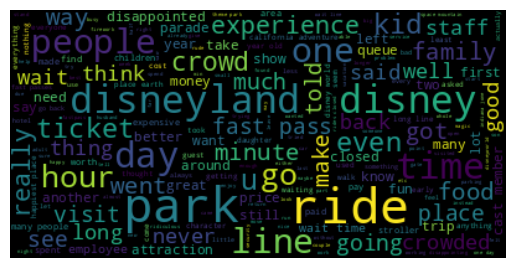

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(df_California_low['Review_Text']))

# # Display the generated image:
# # the matplotlib way:
# import matplotlib.pyplot as plt
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(df_California_low['Review_Text']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##Tokenizer

In [ ]:
df_California_low['Review_Text'] = df_California_low.apply(lambda row: nltk.word_tokenize(row['Review_Text']), axis=1)
df_California_low.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,New_Rating
0,669660324,2,2018-10,United States,"[doubt, legendary, place, dont, think, worth, ...",Disneyland_California,0
1,669505006,1,missing,United States,"[disneyland, several, times, past, 3, decades,...",Disneyland_California,0
2,668730191,2,2019-4,United Kingdom,"[partner, paid, $, 149, tickets, park, partner...",Disneyland_California,0
3,667955757,1,2019-1,Australia,"[comes, happy, place, ,, welcome, ., well, wal...",Disneyland_California,0
4,664615049,1,2019-4,Australia,"[really, disappointed, disneyland.old, ,, tire...",Disneyland_California,0


In [ ]:
print(df_California_low['Review_Text'][0])
print(df_California_low['Review_Text'][1])
print(df_California_low['Review_Text'][2])


['doubt', 'legendary', 'place', 'dont', 'think', 'worth', 'money', 'headache', 'overcrowding', 'overpriced', 'everything', '.', 'disney', 'continues', 'raise', 'price', 'admission', 'crowds', 'ridiculous', 'every', 'single', 'day', '.', 'plenty', 'things', 'socal', 'cheap', 'free', '.', 'save', 'family', 'hundreds', 'dollars', 'go', 'somewhere', 'else', '.']
['disneyland', 'several', 'times', 'past', '3', 'decades', '.', 'visit', ',', 'sensed', 'employees', 'disgruntled', 'unhappy', '.', 'smiles', 'staff', '.', 'addition', ',', 'staff', 'prowling', 'people', 'crossing', 'ropes', 'fantasmic', 'on', '.', 'need', 'fastpass', 'enter', 'watch', 'fan', 'tasmic', 'show', 'everyone', 'situated', 'tons', 'space', 'paying', 'customers', 'without', 'fastpass', '?', 'see', 'attached', 'picture', '.', 'whole', 'show', ',', 'entire', 'space', 'unoccupied', '5', '8', 'yr', 'olds', 'next', 'us', 'straining', 'catch', 'glimpse.if', 'wan', 'na', 'pay', '$', '129', 'stand', 'line', 'hours', 'ride', 'aver

## Lexicon Normalization

###Stemming

In [ ]:

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# this is the function we will use
ps = PorterStemmer()

filtered_sent = df_California_low['Review_Text'][1]

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)


Filtered Sentence: ['disneyland', 'several', 'times', 'past', '3', 'decades', '.', 'visit', ',', 'sensed', 'employees', 'disgruntled', 'unhappy', '.', 'smiles', 'staff', '.', 'addition', ',', 'staff', 'prowling', 'people', 'crossing', 'ropes', 'fantasmic', 'on', '.', 'need', 'fastpass', 'enter', 'watch', 'fan', 'tasmic', 'show', 'everyone', 'situated', 'tons', 'space', 'paying', 'customers', 'without', 'fastpass', '?', 'see', 'attached', 'picture', '.', 'whole', 'show', ',', 'entire', 'space', 'unoccupied', '5', '8', 'yr', 'olds', 'next', 'us', 'straining', 'catch', 'glimpse.if', 'wan', 'na', 'pay', '$', '129', 'stand', 'line', 'hours', 'ride', 'average', '9', 'rides', 'last', '3', '11', 'minute', ',', 'place', 'you', '.', 'disneyland', 'become', 'greedy', 'overcrowd', 'double', 'capacity', 'make', 'money', 'without', 'care', 'customers', '.', 'ridiculous', 'minimal', 'places', 'sit', 'rest', 'large', 'park', '.', 'highly', 'recommend', 'universal', 'studios', 'vip', 'pass', 'mess', '.

In [ ]:

df_California_low['Stemmed'] = df_California_low['Review_Text'].apply(lambda x: [ps.stem(y) for y in x]) # Stem every word.

In [ ]:
# check your work!
print(df_California_low['Review_Text'][0]) # reported
print(df_California_low['Stemmed'][0]) # report

print(df_California_low['Review_Text'][10]) # note the difference between inches, reported, covered
print(df_California_low['Stemmed'][10]) # inch, report, cover

['doubt', 'legendary', 'place', 'dont', 'think', 'worth', 'money', 'headache', 'overcrowding', 'overpriced', 'everything', '.', 'disney', 'continues', 'raise', 'price', 'admission', 'crowds', 'ridiculous', 'every', 'single', 'day', '.', 'plenty', 'things', 'socal', 'cheap', 'free', '.', 'save', 'family', 'hundreds', 'dollars', 'go', 'somewhere', 'else', '.']
['doubt', 'legendari', 'place', 'dont', 'think', 'worth', 'money', 'headach', 'overcrowd', 'overpr', 'everyth', '.', 'disney', 'continu', 'rais', 'price', 'admiss', 'crowd', 'ridicul', 'everi', 'singl', 'day', '.', 'plenti', 'thing', 'socal', 'cheap', 'free', '.', 'save', 'famili', 'hundr', 'dollar', 'go', 'somewher', 'els', '.']
['visited', 'disneyland', 'october', 'november', '2018we', 'bought', '4', ',', '5', 'day', 'passes', 'online', 'due', 'error', 'online', ',', 'unable', 'buy', 'canadian', 'rate', 'discount', 'charged', 'full', 'rate', '(', 'about', '$', '400', 'error', ')', 'called', 'disneyland', 'told', 'happened', 'onli